In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
x = torch.FloatTensor(range(5))
print(x)
x = torch.FloatTensor(range(5)).unsqueeze(1)
print(x)

tensor([0., 1., 2., 3., 4.])
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


In [5]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5, 1)

In [9]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super(LinearRegressor, self).__init__()
        self.fc = nn.Linear(1, 1, bias = True)

    def forward(self, x):
        y = self.fc(x)
        
        return y

In [10]:
model = LinearRegressor()
lr = 1e-3 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [11]:
loss_history = []

for epoch in range(1001):
    optimizer.zero_grad()

    y_hat = model(x)
    loss = criterion(y_hat, y)

    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}:{loss.item()}")

Epoch 0:51.4855842590332
Epoch 100:3.523954391479492
Epoch 200:0.2965072691440582
Epoch 300:0.07921598106622696
Epoch 400:0.06448908150196075
Epoch 500:0.06340482831001282
Epoch 600:0.0632489025592804
Epoch 700:0.06316482275724411
Epoch 800:0.06309394538402557
Epoch 900:0.06303119659423828
Epoch 1000:0.06297562271356583


In [13]:
with torch.no_grad():
    y_hat = model(x)

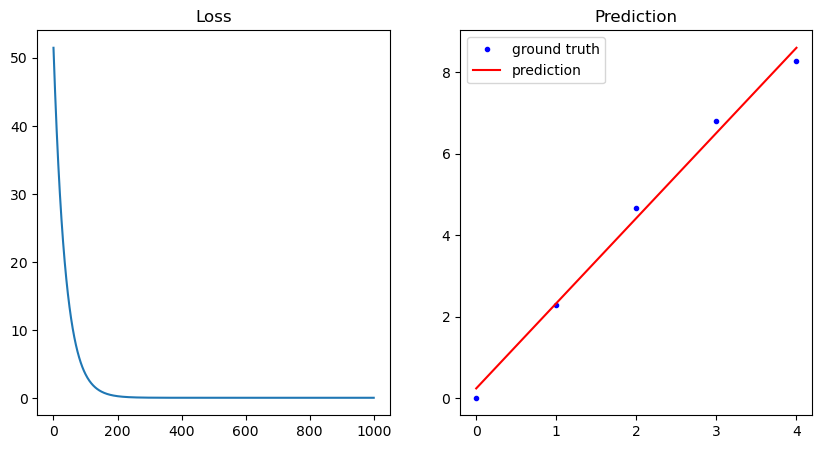

In [14]:
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.plot(loss_history)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title("Prediction")

plt.show()